# Banknote Authentication Dataset using kNN classifier

### (a) Dataset URL:
### https://archive.ics.uci.edu/ml/datasets/banknote+authentication#.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

df= pd.read_csv('data_banknote_authentication.txt', names=["F1","F2","F3","F4","Classes"])

FileNotFoundError: [Errno 2] File b'data_banknote_authentication.txt' does not exist: b'data_banknote_authentication.txt'

### Pre-Processing and Exploratory data analysis:

### i. Scatterplots of the independent variables in the dataset. Used color to show Classes 0 and 1.

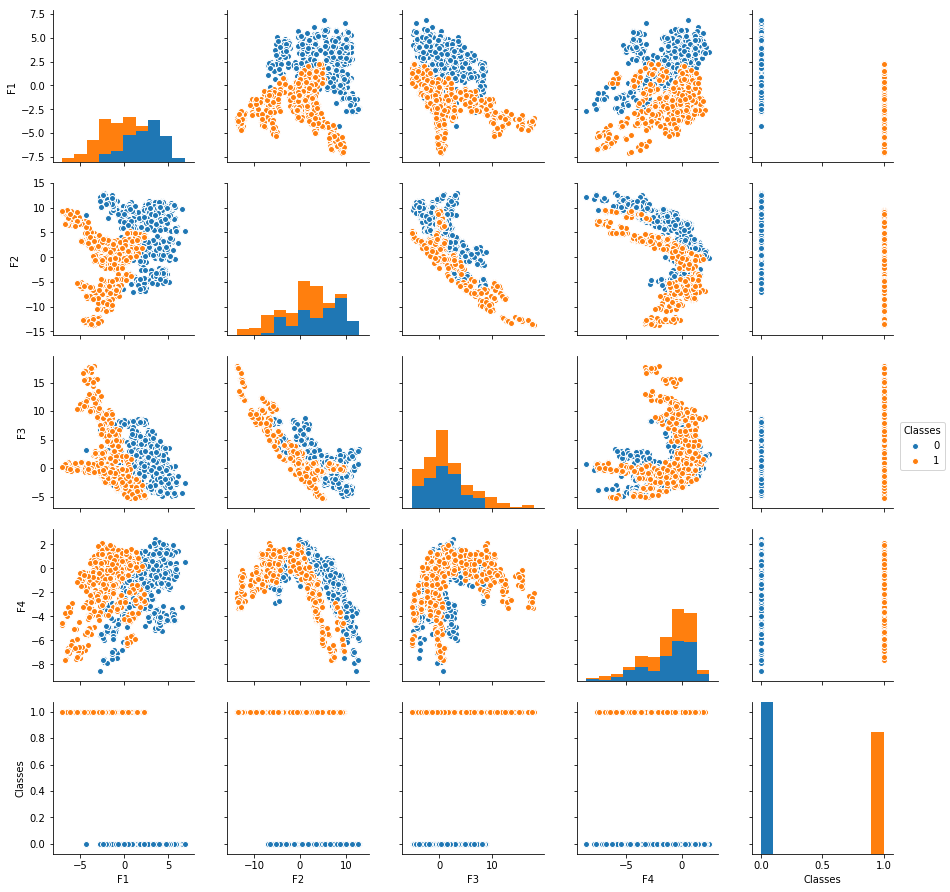

In [68]:
c = sns.pairplot(df, hue="Classes")
plt.figure()

### ii. Boxplots for each of the independent variables. Used color to show Classes 0 and 1

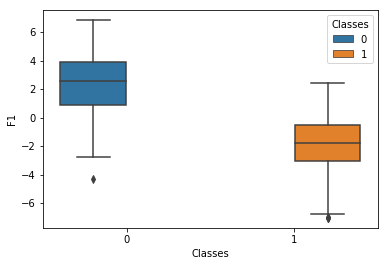

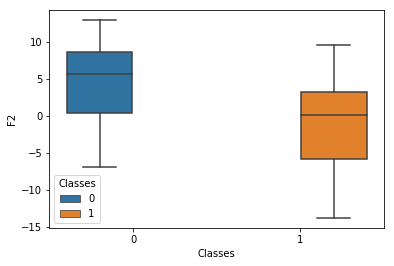

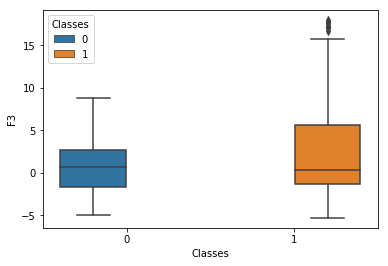

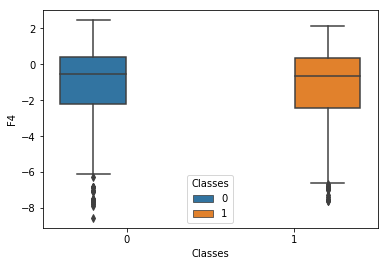

In [59]:

c13= sns.boxplot( y="F1", x="Classes", hue="Classes", data=df)
plt.figure()
c14= sns.boxplot( y="F2", x="Classes", hue="Classes", data=df)
plt.figure()
c15= sns.boxplot( y="F3", x="Classes", hue="Classes", data=df)
plt.figure()
c16= sns.boxplot( y="F4", x="Classes", hue="Classes", data=df)


### iii. Select the first 200 rows of Class 0 and the first 200 rows of Class 1 as the test set and the rest of the data as the training set.

In [67]:
c0= df[df["Classes"]==0]
c1= df[df["Classes"]==1]
c3= c0.head(200)
c4= c1.head(200)
c5=[c3, c4]
Test= pd.concat(c5)
c7= len(c0)
c8= len(c1)
c9= c0.iloc[200:762]
c10= c1.iloc[200:610]
c11=[c9, c10]
Train= pd.concat(c11)

### (c) Classification using KNN on Banknote authentication Dataset

### i. k-nearest neighbors with Euclidean metric and majority polling for decision making while testing

In [70]:
neigh = KNeighborsClassifier()
X1= Train.drop(columns='Classes')
y1= Train.Classes
neigh.fit(X1, y1) 
Z1= Test.drop(columns='Classes')
L1 = neigh.predict(Z1)
print(neigh.predict(Z1))
error = 1- accuracy_score(L1,Test.Classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### ii. Finding best k using cross validation: 

k*= 19


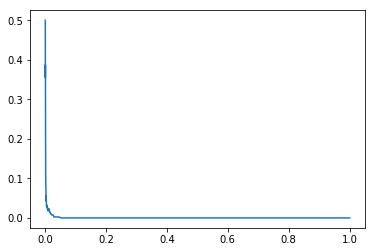

In [84]:
List11=[]
List21=[]
ErrorMin_c2=1
Kmax_c2=1
for k in range(1,902,3):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X, y) 
    Z1= Test.drop(columns='Classes')
    L1= neigh.predict(Z)
    accuracy_score(L1,Test.Classes)
    error = 1- accuracy_score(L1,Test.Classes)
    List11.append(1/k)
    List21.append(error)
    if error<= ErrorMin_c2:
        ErrorMin_c2= error
        Kmax_c2=k;
print("k*=",Kmax_c2)
plt.plot(List11,List21)    

k*= 16


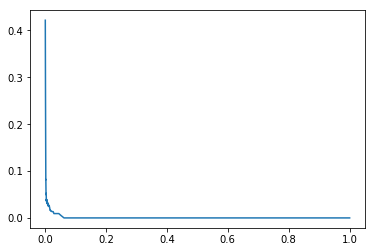

In [87]:
List12=[]
List22=[]
ErrorMin_c3=1
Kmax_c3=1
for k in range(1,902,3):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X, y) 
    Z2= Train.drop(columns='Classes')
    L2= neigh.predict(Z2)
    accuracy_score(L2,Train.Classes)
    error = 1- accuracy_score(L2,Train.Classes)
    List12.append(1/k)
    List22.append(error)
    if error<= ErrorMin_c2:
        ErrorMin_c3= error
        Kmax_c3=k;
print("k*=",Kmax_c3)
plt.plot(List12,List22) 

### Calculate the confusion matrix, true positive rate, true negative rate, precision, and F-score when k = k∗

In [102]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X, y) 
Z1= Test.Classes
L1= neigh.predict(Z)
print("Confusion Matrix",confusion_matrix(Z1,L1))
tn, fp, fn, tp = confusion_matrix(Z1,L1).ravel()
(tn, fp, fn, tp)
tpr= tp/(tp +fn)
tnr= tn/(tn +fp)
print("tpr=",tpr)
print("tnr=",tnr)
ppv= tp/(tp+fp)
print("ppv=",ppv)
npv= tn/(tn+fn)
f=2*(ppv*npv)/(ppv+npv)
print("f=",f)

Confusion Matrix [[200   0]
 [  0 200]]
tpr= 1.0
tnr= 1.0
ppv= 1.0
f= 1.0


### iii. Plotting the Learning Curve.

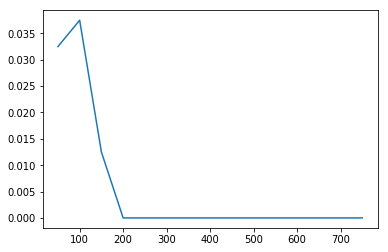

In [89]:
kmin= 100
List11=[]
List21=[]
errorMin=1
for n in range(50,800,50):
    errorMin=1
    for k in range(1,n,40):
        neigh = KNeighborsClassifier(n_neighbors=k)
        d9= c0.iloc[200:762]
        d10= c1.iloc[200:610]
        d11=[d9, d10]
        TrainOld= pd.concat(d11)
        d12= TrainOld.iloc[0:n//2]
        d13= TrainOld.iloc[562:562+(n//2)]
        d14=[d12, d13]
        Train1= pd.concat(d14)
        X1=Train1.drop(columns='Classes')
        y1=Train1.Classes
        neigh.fit(X1, y1) 
        Z1= Test.drop(columns='Classes')
        L1= neigh.predict(Z1)
        error = 1- accuracy_score(L1,Test.Classes)
        if error< errorMin:
            errorMin= error  
    List11.append(n)
    List21.append(errorMin)
plt.plot(List11,List21)
plt.show()
    

### (d) Replaced the Euclidean metric with the following metrics:

### i. Minkowski Distance: 
### A. which becomes Manhattan Distance with p = 1

In [91]:
ErrorMin_d1a=1
Kmax_d1a=1000
for k in range(1,901,10):
    neigh = KNeighborsClassifier(n_neighbors=k, p=1)
    neigh.fit(X, y) 
    Z1= Test.drop(columns='Classes')
    L1= neigh.predict(Z1)
    accuracy_score(L1,Test.Classes)
    error = 1- accuracy_score(L1,Test.Classes)
    if error<= ErrorMin_d:
        ErrorMin_d1a= error
        Kmax_d1a=k;
print("k*=",Kmax_d1a)
    

k*= 11


### B. Cross-validating p for best log10(p)

In [92]:

def log_Dist(x,y,**io):
    p= io["t"]
    return np.sum(abs(np.subtract(x,y))**p)**(1/p)

ErrorMin_db=1
for p in np.arange(0.1,1.1,0.1):
    neigh = KNeighborsClassifier(n_neighbors=11, metric= log_Dist, metric_params={'t':10**p})
    neigh.fit(X, y) 
    Z1= Test.drop(columns='Classes')
    L1= neigh.predict(Z1)
    accuracy_score(L1,Test.Classes)
    error = 1- accuracy_score(L1,Test.Classes)
    if error<= ErrorMin_db:
        ErrorMin_db= error
        pBest=p;
print("log(p)=",p)


log(p)= 1.0


### C. which becomes Chebyshev Distance with p → ∞

In [93]:
ErrorMin_d1c=1
Kmax_d1c=1000
for k in range(1,901,10):
    neigh = KNeighborsClassifier(n_neighbors=k, metric= "chebyshev")
    neigh.fit(X, y) 
    Z1= Test.drop(columns='Classes')
    L1= neigh.predict(Z1)
    accuracy_score(L1,Test.Classes)
    error = 1- accuracy_score(L1,Test.Classes)
    if error<= ErrorMin_d1c:
        ErrorMin_d1c= error
        Kmax_d1c=k;
print("k*=",Kmax_d1c)
    

k*= 11


### ii. Mahalanobis Distance.

In [94]:
ErrorMin_d2=1
Kmax_d2=1000
for k in range(1,901,10):
    neigh = KNeighborsClassifier(n_neighbors=k, metric= 'mahalanobis', metric_params={'V':np.cov(X.T)})
    neigh.fit(X, y) 
    Z1= Test.drop(columns='Classes')
    L1= neigh.predict(Z1)
    accuracy_score(L1,Test.Classes)
    error = 1- accuracy_score(L1,Test.Classes)
    if error<= ErrorMin_d2:
        ErrorMin_d2= error
        Kmax_d2=k;
print("k*=",Kmax_d2)
    

k*= 11


### Summary of Test Errors(Unweighted)

In [55]:
KNonWeighted=[Kmax_d1a,Kmax_d1c,Kmax_d2]
Error1=[ErrorMin_d1a,ErrorMin_d1c,ErrorMin_d2]
Table1= {'Metric':['Manhattan','Chebyshev','Mahalanobis'], 'k*': KNonWeighted, 'Error': Error1}
t2= pd.DataFrame.from_dict(Table1)

In [56]:
t2


,Error,Metric,k*
0,0.0,Manhattan,11
1,0.0,Chebyshev,11
2,0.0,Mahalanobis,11


###  The majority polling decision is replaced by weighted decision. Used weighted voting with Euclidean, Manhattan, and Chebyshev distances

In [95]:
ErrorMin_e2=1
Kmaxe2=1000
for k in range(1,901,10):
    neigh = KNeighborsClassifier(n_neighbors=k, p=1, weights= 'distance')
    neigh.fit(X, y) 
    Z1= Test.drop(columns='Classes')
    L1= neigh.predict(Z1)
    accuracy_score(L1,Test.Classes)
    error = 1- accuracy_score(L1,Test.Classes)
    if error<= ErrorMin_e2:
        ErrorMin_e2= error
        Kmaxe2=k;
print("k*=",Kmaxe2)

k*= 81


In [96]:
ErrorMin_e1=1
Kmaxe1=1000
for k in range(1,901,10):
    neigh = KNeighborsClassifier(n_neighbors=k, weights= 'distance')
    neigh.fit(X, y) 
    Z1= Test.drop(columns='Classes')
    L1= neigh.predict(Z1)
    accuracy_score(L1,Test.Classes)
    error = 1- accuracy_score(L1,Test.Classes)
    if error<= ErrorMin_e1:
        ErrorMin_e1= error
        Kmaxe1=k;
print("k*=",Kmaxe1)

k*= 51


In [97]:
ErrorMin_e3=1
Kmaxe3=1000
for k in range(1,901,10):
    neigh = KNeighborsClassifier(n_neighbors=k, weights= 'distance',metric= 'chebyshev')
    neigh.fit(X, y) 
    Z1= Test.drop(columns='Classes')
    L1= neigh.predict(Z1)
    accuracy_score(L1,Test.Classes)
    error = 1- accuracy_score(L1,Test.Classes)
    if error<= ErrorMin_e3:
        ErrorMin_e3= error
        Kmaxe3=k;
print("k*=",Kmaxe3)

k*= 481


### Summary of Test Errors(Weighted)

In [42]:
KWeighted=[Kmaxe1,Kmaxe2,Kmaxe3]
Error=[ErrorMin_e1,ErrorMin_e2,ErrorMin_e3]
Table2= {'Metric':['Euclidian','Manhattan','Chebyshev'], 'k*': KWeighted, 'Error': Error}
t2= pd.DataFrame.from_dict(Table2)


In [43]:
t2

,Error,Metric,k*
0,0.0,Euclidian,51
1,0.0,Manhattan,81
2,0.0,Chebyshev,481


### (f) What is the lowest training error rate you achieved in this exercise?

Lowest training error is 0.0